In [37]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# global recoding on age and pram on sex 
anonymised_data = pd.read_csv("deanon_data/anonymised_dataB.csv")
# global recoding on age, global recoding on marital status 
register_data = pd.read_excel("deanon_data/public_data_registerB.xlsx")
# global recodign on age, global recoding on marital status, and pram on sex 
results_data = pd.read_excel("deanon_data/public_data_resultsB.xlsx")
leaked_names = pd.read_csv("deanon_data/survey_listB.txt", header = None, names = ["Name"], sep='\t')

In [ ]:
people_data = pd.merge(leaked_names, register_data, left_on='Name', right_on='name', how='left').drop('name', axis=1)
people_data

,Name,sex,dob,zip,citizenship,marital_status,last_voted
0,"Shahi, Kristian",Male,1984-08-22,2300,Denmark,Never married,1
1,"Starcer, Andrew",Male,1967-06-30,2400,Denmark,Never married,0
2,"Koontz, Tyler",Male,1968-03-27,2300,Denmark,Married/separated,0
3,"Sanchez, Marcus",Male,1953-05-13,2300,Denmark,Married/separated,1
4,"Knighten, Kenneth",Male,1965-07-15,2200,Denmark,Married/separated,0
...,...,...,...,...,...,...,...
195,"Kotalik, Mitchell",Male,2003-08-16,2200,Denmark,Never married,1
196,"Lopes, Jenna",Female,1966-05-07,2300,Denmark,Divorced,0
197,"el-Karim, Maajid",Male,1992-10-02,2400,Denmark,Never married,1
198,"Guerrero, Jennifer",Female,1985-03-01,2300,Denmark,Married/separated,0


# EDA

In [12]:
# naming the unnamed column to "where voting" as it refers to polling stations and evotes
results_data = results_data.rename(columns = {"Unnamed: 0":"where_voting"})

# creating a transformed version of the results data for evotes vs polling stations
def rename(x): 
    if "Polling station" in x: 
        return "Polling station"
    else: 
        return "E-votes"
transformed_results_data = results_data.copy()
transformed_results_data["where_voting"]= transformed_results_data["where_voting"].apply(lambda x: rename(x))
agg_functions = {'Red': 'sum','Green': 'sum', 'Invalid ballots': 'sum' ,'Total': 'sum'  }
new_results_data = transformed_results_data.groupby(transformed_results_data["where_voting"]).aggregate(agg_functions).reset_index()

<Axes: title={'center': 'Voting results vote split'}, xlabel='where_voting'>

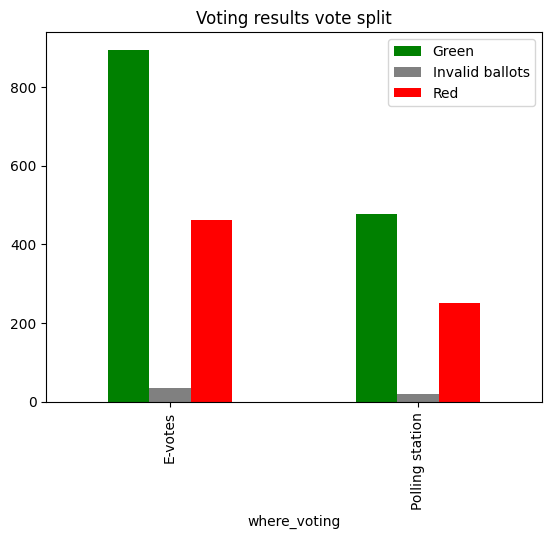

In [23]:
# Define a color list for each party
party_colors = ["green", "gray", "red"]

# Plot the results data
new_results_data.plot(kind='bar', x='where_voting', y=['Green', 'Invalid ballots', 'Red'], color=party_colors, title= "Voting results vote split")

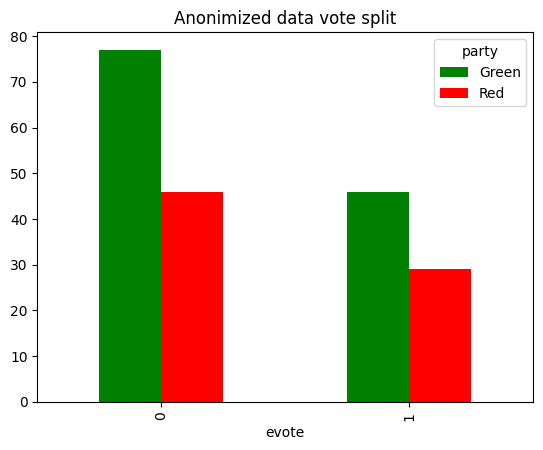

In [24]:
colors = ["Green", "Red"]
# Plot the survey data
plot_data = anonymised_data.groupby(["evote", "party"]).size().unstack().plot(kind='bar',color=colors,title = "Anonimized data vote split")

### Checking the distributions

In [26]:
anonymised_data

,sex,evote,marital_status,party,age_group,zip_region,education_category,Danish_Citizenship
0,Male,1,Never married,Red,40-49,Region 1,Higher Education,True
1,Female,0,Divorced,Green,70+,Region 2,Basic Education,True
2,Female,0,Never married,Green,18-29,Region 3,Basic Education,True
3,Female,0,Never married,Red,30-39,Region 1,Vocational and Short-Cycle Education,True
4,Male,1,Married/separated,Red,50-59,Region 1,Vocational and Short-Cycle Education,True
...,...,...,...,...,...,...,...,...
193,Female,0,Married/separated,Red,50-59,Region 3,Basic Education,True
194,Male,1,Never married,Green,18-29,Region 1,Vocational and Short-Cycle Education,True
195,Female,0,Married/separated,Green,30-39,Region 2,Basic Education,True
196,Male,1,Married/separated,Red,40-49,Region 3,Higher Education,True


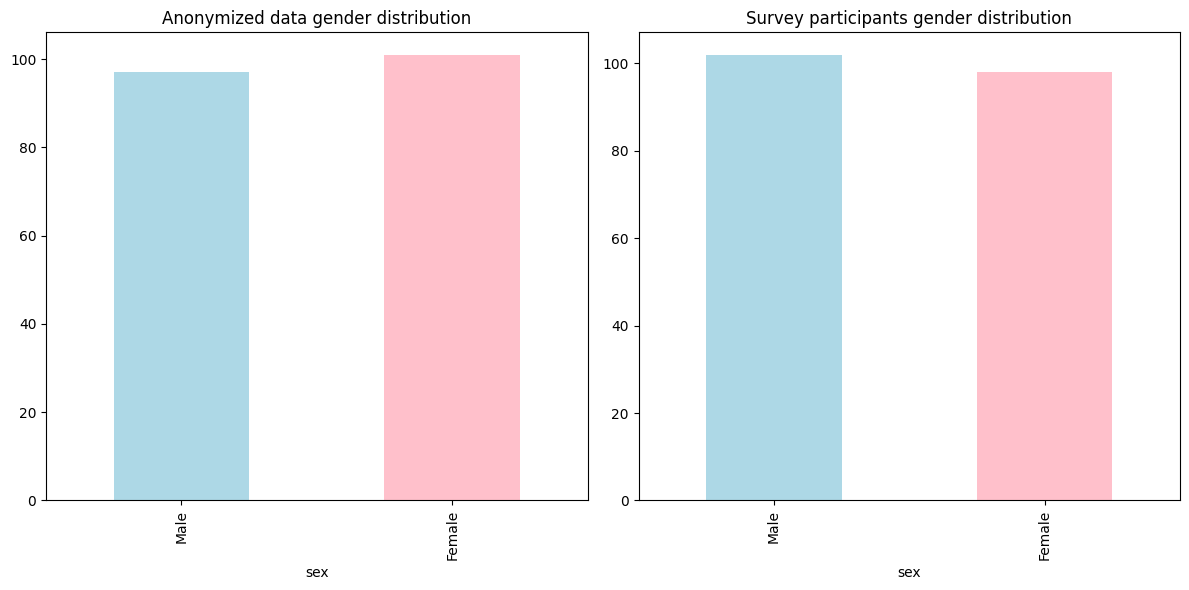

Anon data sex
Male       97
Female    101
Name: count, dtype: int64
survey participant sex
Male      102
Female     98
Name: count, dtype: int64


In [61]:
bar_order = ['Male', 'Female']
color = ["lightblue", "pink"]
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
anonymised_counts = anonymised_data["sex"].value_counts()
anonymised_counts = anonymised_counts.reindex(bar_order, fill_value=0)  # Reindex to enforce order
anonymised_counts.plot(kind = "bar",  ax=axes[0], title = "Anonymized data gender distribution", color = color)

people_counts = people_data["sex"].value_counts()
people_counts = people_counts.reindex(bar_order, fill_value=0)  # Reindex to enforce order
people_counts.plot(kind = "bar",  ax=axes[1], title = "Survey participants gender distribution", color = color)
plt.tight_layout()
plt.show()

print("Anon data",anonymised_counts)
print("survey participant", people_counts)

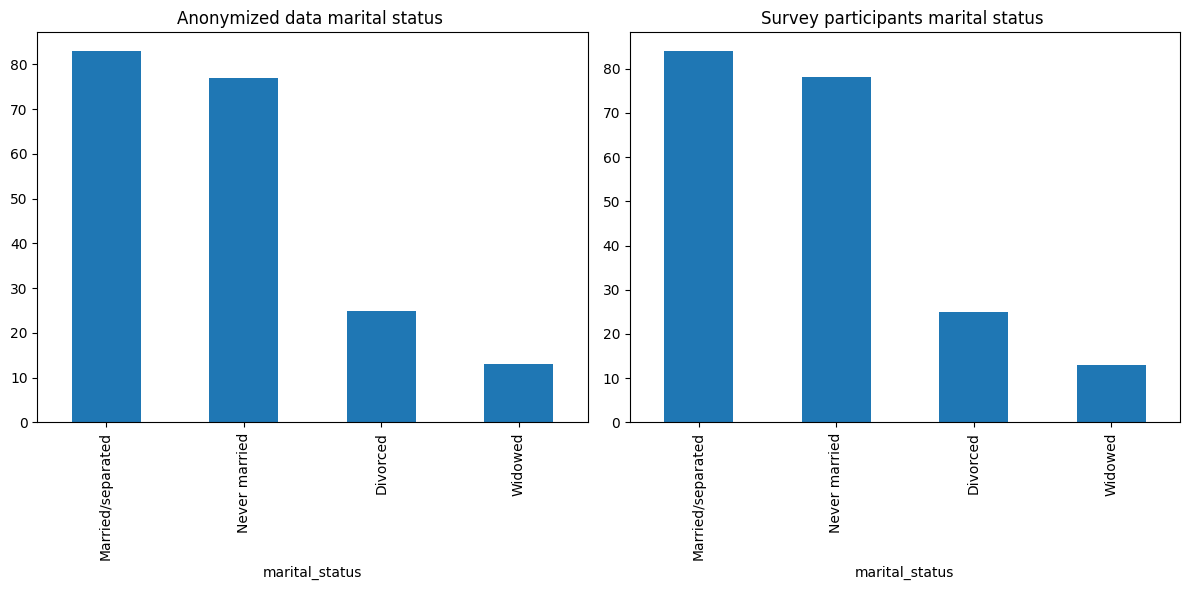

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
anonymised_data["marital_status"].value_counts().plot(kind = "bar",  ax=axes[0], title = "Anonymized data marital status ")
people_data["marital_status"].value_counts().plot(kind = "bar",  ax=axes[1], title = "Survey participants marital status ")
plt.tight_layout()
plt.show()

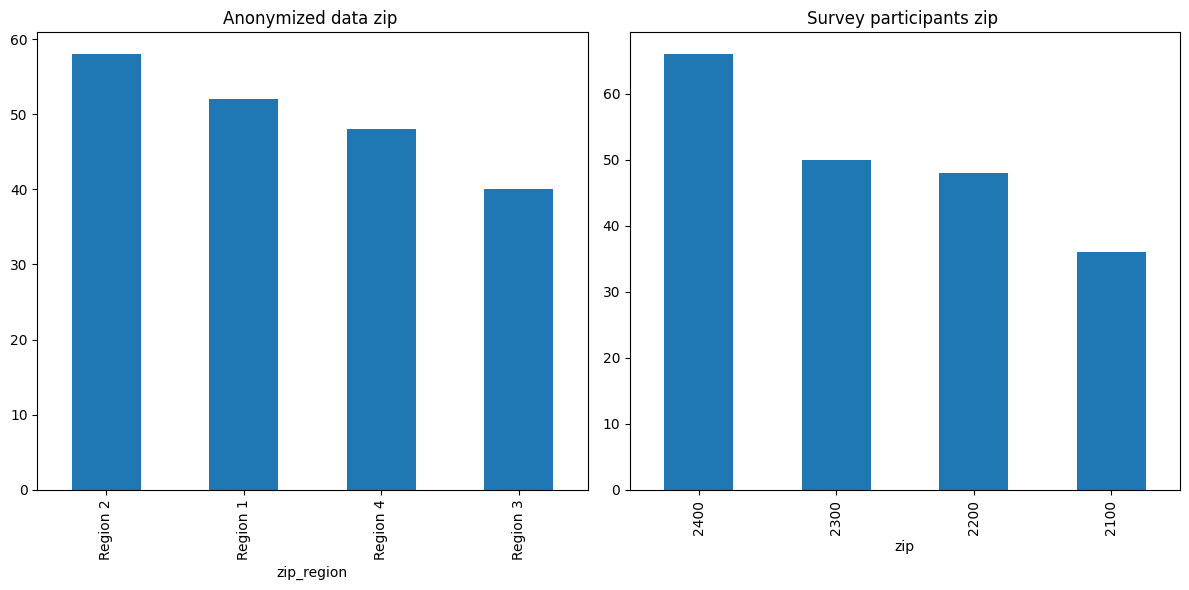

Anon data zip_region
Region 2    58
Region 1    52
Region 4    48
Region 3    40
Name: count, dtype: int64
survey participant zip
2400    66
2300    50
2200    48
2100    36
Name: count, dtype: int64


In [71]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
anonymised_data["zip_region"].value_counts().plot(kind = "bar",  ax=axes[0], title = "Anonymized data zip ")
people_data["zip"].value_counts().plot(kind = "bar",  ax=axes[1], title = "Survey participants zip ")
plt.tight_layout()
plt.show()

print("Anon data", anonymised_data["zip_region"].value_counts())
print("survey participant", people_data["zip"].value_counts())

In [52]:
print("Anon data", anonymised_data["marital_status"].value_counts())
print("survey participant", people_data["marital_status"].value_counts())

Anon data marital_status
Married/separated    83
Never married        77
Divorced             25
Widowed              13
Name: count, dtype: int64
survey participant marital_status
Married/separated    84
Never married        78
Divorced             25
Widowed              13
Name: count, dtype: int64


In [46]:
anonymised_data[anonymised_data["marital_status"] == "Widowed"]

,sex,evote,marital_status,party,age_group,zip_region,education_category,Danish_Citizenship
20,Female,0,Widowed,Red,70+,Region 4,Vocational and Short-Cycle Education,True
27,Female,0,Widowed,Red,70+,Region 2,Higher Education,True
30,Female,0,Widowed,Red,70+,Region 1,Basic Education,True
35,Female,0,Widowed,Red,70+,Region 4,Vocational and Short-Cycle Education,True
60,Male,1,Widowed,Green,50-59,Region 2,Vocational and Short-Cycle Education,True
65,Male,0,Widowed,Green,60-69,Region 1,Vocational and Short-Cycle Education,False
70,Male,0,Widowed,Green,70+,Region 2,Basic Education,True
73,Female,1,Widowed,Green,60-69,Region 4,Vocational and Short-Cycle Education,True
101,Female,0,Widowed,Red,60-69,Region 4,Vocational and Short-Cycle Education,True
138,Female,0,Widowed,Red,70+,Region 2,Vocational and Short-Cycle Education,True


In [47]:
people_data[people_data["marital_status"] == "Widowed"]

,Name,sex,dob,zip,citizenship,marital_status,last_voted
10,"Harris, Kyra",Female,1947-01-09,2300,Denmark,Widowed,0
15,"Jiron, Jamie",Female,1939-11-13,2300,Denmark,Widowed,0
18,"Tway, Kailey",Female,1936-03-18,2400,Denmark,Widowed,0
30,"Blanco, Brianna",Female,1941-02-26,2300,Denmark,Widowed,0
37,"Fong, Jasmine",Female,1960-04-19,2300,Denmark,Widowed,0
86,"el-Mahmud, Muneera",Female,1922-10-08,2400,Denmark,Widowed,0
87,"al-Moradi, Shaheer",Male,1972-11-16,2400,Denmark,Widowed,1
96,"al-Dar, Waneesa",Female,1952-12-19,2300,Denmark,Widowed,0
122,"Valdez, Rosie",Female,1961-03-05,2300,Denmark,Widowed,0
126,"Smith, Sadie",Female,1934-03-25,2400,Denmark,Widowed,0


In [53]:
anonymised_data[anonymised_data["marital_status"] == "Divorced"]

,sex,evote,marital_status,party,age_group,zip_region,education_category,Danish_Citizenship
1,Female,0,Divorced,Green,70+,Region 2,Basic Education,True
6,Female,0,Divorced,Red,70+,Region 1,Vocational and Short-Cycle Education,True
7,Male,0,Divorced,Green,18-29,Region 3,Vocational and Short-Cycle Education,True
9,Male,0,Divorced,Green,40-49,Region 3,Vocational and Short-Cycle Education,True
15,Female,0,Divorced,Green,60-69,Region 3,Vocational and Short-Cycle Education,True
18,Male,0,Divorced,Green,50-59,Region 1,Vocational and Short-Cycle Education,False
36,Female,0,Divorced,Red,60-69,Region 2,Vocational and Short-Cycle Education,True
42,Female,0,Divorced,Green,40-49,Region 1,Vocational and Short-Cycle Education,True
49,Female,1,Divorced,Green,60-69,Region 2,Vocational and Short-Cycle Education,False
55,Male,1,Divorced,Green,40-49,Region 4,Vocational and Short-Cycle Education,True


In [54]:
people_data[people_data["marital_status"] == "Divorced"]

,Name,sex,dob,zip,citizenship,marital_status,last_voted
8,"el-Ghaffari, Maisoon",Male,1972-05-03,2300,Denmark,Divorced,0
13,"Tafoya, Elias",Male,1979-07-21,2400,Denmark,Divorced,0
28,"Hanshaw, William",Male,1960-06-09,2200,Denmark,Divorced,0
32,"Montoya, Alenia",Female,1963-05-16,2400,Denmark,Divorced,0
35,"al-Hassan, Abdul Waahid",Male,1967-04-06,2300,Denmark,Divorced,0
47,"Ignacio, Jacob",Male,1978-05-29,2200,Denmark,Divorced,0
55,"Garcia, Shamika",Female,1955-02-18,2400,Czech Republic,Divorced,1
64,"Mcleod, Zane",Male,1968-09-18,2200,Denmark,Divorced,0
66,"Nestor, Jannie",Female,1976-01-04,2300,Denmark,Divorced,0
71,"el-Siddiqui, Thamra",Female,1970-04-28,2200,Denmark,Divorced,0


In [68]:
people_data[people_data["marital_status"] == "Widowed"].groupby("zip").count()

,Name,sex,dob,citizenship,marital_status,last_voted
zip,,,,,,
2200,1,1,1,1,1,1
2300,7,7,7,7,7,7
2400,5,5,5,5,5,5


In [72]:
anonymised_data[anonymised_data["marital_status"] == "Widowed"].groupby("zip_region").count()

,sex,evote,marital_status,party,age_group,education_category,Danish_Citizenship
zip_region,,,,,,,
Region 1,2,2,2,2,2,2,2
Region 2,6,6,6,6,6,6,6
Region 4,5,5,5,5,5,5,5


In [79]:
people_data[people_data["marital_status"] == "Married/separated"].groupby("zip").count()

,Name,sex,dob,citizenship,marital_status,last_voted
zip,,,,,,
2100,12,12,12,12,12,12
2200,18,18,18,18,18,18
2300,20,20,20,20,20,20
2400,34,34,34,34,34,34


In [80]:
anonymised_data[anonymised_data["marital_status"] == "Married/separated"].groupby("zip_region").count()

,sex,evote,marital_status,party,age_group,education_category,Danish_Citizenship
zip_region,,,,,,,
Region 1,19,19,19,19,19,19,19
Region 2,26,26,26,26,26,26,26
Region 3,14,14,14,14,14,14,14
Region 4,24,24,24,24,24,24,24
